In [ ]:
# python实现

样本集下载：

In [2]:
!wget https://ghproxy.com/https://github.com/626626cdllp/data-mining/blob/master/SVM/testSet.txt

--2022-09-20 00:05:18--  https://ghproxy.com/https://github.com/626626cdllp/data-mining/blob/master/SVM/testSet.txt
Resolving ghproxy.com (ghproxy.com)... 146.56.146.190
Connecting to ghproxy.com (ghproxy.com)|146.56.146.190|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: https://ghproxy.com/https://github.com/data-infra/data-mining/raw/master/SVM/testSet.txt [following]
--2022-09-20 00:05:18--  https://ghproxy.com/https://github.com/data-infra/data-mining/raw/master/SVM/testSet.txt
Reusing existing connection to ghproxy.com:443.
HTTP request sent, awaiting response... 302 FOUND
Location: https://ghproxy.com/https://raw.githubusercontent.com/data-infra/data-mining/master/SVM/testSet.txt [following]
--2022-09-20 00:05:19--  https://ghproxy.com/https://raw.githubusercontent.com/data-infra/data-mining/master/SVM/testSet.txt
Reusing existing connection to ghproxy.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 2108 (2.1K) [text/pla

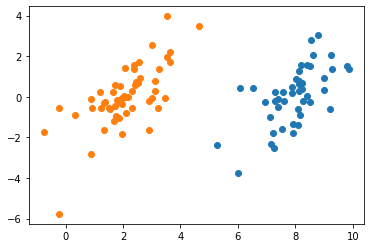

第0次迭代 样本:0, alpha优化次数:1
L==H
L==H
L==H
alpha_j变化太小
L==H
L==H
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
L==H
L==H
L==H
第0次迭代 样本:36, alpha优化次数:2
L==H
L==H
第0次迭代 样本:54, alpha优化次数:3
第0次迭代 样本:55, alpha优化次数:4
L==H
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:97, alpha优化次数:5
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:17, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:24, alpha优化次数:2
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:36, alpha优化次数:3
L==H
L==H
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
L==H
L==H
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:17, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:30, alpha优化次数:2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
迭代次数: 0
第0次迭代 样本:0, alpha优化次数:1
L==H
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:30, alpha优化次数:2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
L==H
迭代次数: 0
alpha

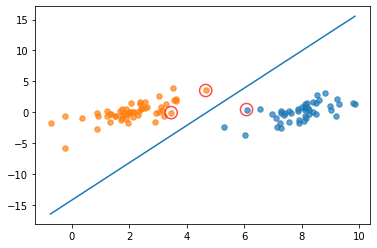

In [3]:
# -*- coding:UTF-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import random


# 简化版smo


# 函数说明:读取数据
def loadDataSet(fileName):
    alldata = np.loadtxt(fileName)
    dataMat = alldata[:,0:2]   #添加数据
    labelMat = alldata[:,2]   #.astype(int).reshape(-1,1)  #添加标签
    return dataMat,labelMat


"""
函数说明:随机选择alpha

Parameters:
    i - alpha_i的索引值
    m - alpha参数个数
Returns:
    j - alpha_j的索引值

"""
def selectJrand(i, m):
    j = i                                 #选择一个不等于i的j
    while (j == i):
        j = int(random.uniform(0, m))
    return j

"""
函数说明:修剪alpha

Parameters:
    aj - alpha_j值
    H - alpha上限
    L - alpha下限
Returns:
    aj - alpah值

"""
def clipAlpha(aj,H,L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj


# 函数说明:数据可视化
def showDataSet(dataMat, labelMat):

    place_plus = np.where(labelMat==1)[0]   # 正样本的位置
    place_minus = np.where(labelMat==-1)[0]  # 负样本的位置
    data_plus = dataMat[place_plus]    #正样本
    data_minus = dataMat[place_minus]  #负样本

    plt.scatter(np.transpose(data_plus)[0], np.transpose(data_plus)[1])   #正样本散点图
    plt.scatter(np.transpose(data_minus)[0], np.transpose(data_minus)[1]) #负样本散点图
    plt.show()


"""
函数说明:简化版SMO算法

Parameters:
    dataMatIn - 数据矩阵
    classLabels - 数据标签
    C - 松弛变量
    toler - 容错率
    maxIter - 最大迭代次数
"""
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    #转换为numpy的mat存储
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    #初始化b参数，统计dataMatrix的维度
    b = 0; m,n = np.shape(dataMatrix)
    #初始化alpha参数，设为0
    alphas = np.mat(np.zeros((m,1)))
    #初始化迭代次数
    iter_num = 0
    #最多迭代matIter次
    while (iter_num < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            #步骤1：计算误差Ei
            fXi = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = fXi - float(labelMat[i])
            #优化alpha，设定一定的容错率。
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                #随机选择另一个与alpha_i成对优化的alpha_j
                j = selectJrand(i,m)
                #步骤1：计算误差Ej
                fXj = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                #保存更新前的aplpha值，使用深拷贝
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                #步骤2：计算上下界L和H
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print("L==H"); continue
                #步骤3：计算eta
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print("eta>=0"); continue
                #步骤4：更新alpha_j
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                #步骤5：修剪alpha_j
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print("alpha_j变化太小"); continue
                #步骤6：更新alpha_i
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                #步骤7：更新b_1和b_2
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                #步骤8：根据b_1和b_2更新b
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                #统计优化次数
                alphaPairsChanged += 1
                #打印统计信息
                print("第%d次迭代 样本:%d, alpha优化次数:%d" % (iter_num,i,alphaPairsChanged))
        #更新迭代次数
        if (alphaPairsChanged == 0): iter_num += 1
        else: iter_num = 0
        print("迭代次数: %d" % iter_num)
    return b,alphas

"""
函数说明:分类结果可视化

Parameters:
	dataMat - 数据矩阵
    w - 直线法向量
    b - 直线解决
"""
def showClassifer(dataMat, w, b):
    # 绘制样本点
    place_plus = np.where(labelMat==1)[0]   # 正样本的位置
    place_minus = np.where(labelMat==-1)[0]  # 负样本的位置

    data_plus = dataMat[place_plus]    #正样本
    data_minus = dataMat[place_minus]  #负样本

    plt.scatter(np.transpose(data_plus)[0], np.transpose(data_plus)[1],s=30, alpha=0.7)   #正样本散点图
    plt.scatter(np.transpose(data_minus)[0], np.transpose(data_minus)[1], s=30, alpha=0.7) #负样本散点图


    #绘制直线
    x1 = max(dataMat[:,0])  # 第一个属性的最大值
    x2 = min(dataMat[:,0])  # 第一个属性的最小值
    a1, a2 = w
    b = float(b)
    a1 = float(a1[0])
    a2 = float(a2[0])
    y1, y2 = (-b- a1*x1)/a2, (-b - a1*x2)/a2
    plt.plot([x1, x2], [y1, y2])
    #找出支持向量点
    for i, alpha in enumerate(alphas):
        if abs(alpha) > 0:
            x, y = dataMat[i]
            plt.scatter([x], [y], s=150, c='none', alpha=0.7, linewidth=1.5, edgecolor='red')
    plt.show()


"""
函数说明:计算w

Parameters:
	dataMat - 数据矩阵
    labelMat - 数据标签
    alphas - alphas值
"""
def get_w(dataMat, labelMat, alphas):
    alphas, dataMat, labelMat = np.array(alphas), np.array(dataMat), np.array(labelMat)
    w = np.dot((np.tile(labelMat.reshape(1, -1).T, (1, 2)) * dataMat).T, alphas)
    return w.tolist()


if __name__ == '__main__':
    dataMat, labelMat = loadDataSet('testSet.txt')
    showDataSet(dataMat,labelMat)
    b,alphas = smoSimple(dataMat, labelMat, 0.6, 0.001, 40)
    w = get_w(dataMat, labelMat, alphas)
    showClassifer(dataMat, w, b)

# 3、非线性向量机


**1 核技巧**

我们已经了解到，SVM如何处理线性可分的情况，而对于非线性的情况，SVM的处理方式就是选择一个核函数。

简而言之：在线性不可分的情况下，SVM通过某种事先选择的非线性映射（核函数）将输入变量映到一个高维特征空间，将其变成在高维空间线性可分，在这个高维空间中构造最优分类超平面。

线性可分的情况下，可知最终的超平面方程为：
$$f(x)=\sum_{i=1}^nα_iy_ix_i^Tx+b$$

将上述公式用内积来表示：
$$f(x)=\sum_{i=1}^nα_iy_i<x_i,x>+b$$

对于线性不可分，我们使用一个非线性映射，将数据映射到特征空间，在特征空间中使用线性学习器，分类函数变形如下：

$$f(x)=\sum_{i=1}^nα_iy_i<ϕ(x_i),ϕ(x)>+b$$

其中$ϕ$从输入空间(X)到某个特征空间(F)的映射，这意味着建立非线性学习器分为两步：

 - 首先使用一个非线性映射将数据变换到一个特征空间F；
 - 然后在特征空间使用线性学习器分类。

如果有一种方法可以在特征空间中直接计算内积$<ϕ(x_i),ϕ(x)>$，就像在原始输入点的函数中一样，就有可能将两个步骤融合到一起建立一个分线性的学习器，这样直接计算的方法称为核函数方法。

这里直接给出一个定义：核是一个函数k，对所有$x,z∈X$，满足$k(x,z)=<ϕ(x_i),ϕ(x)>$，这里$ϕ(·)$是从原始输入空间X到内积空间F的映射。

简而言之：如果不是用核技术，就会先计算线性映$ϕ(x_1)和ϕ(x_2)$，然后计算这它们的内积，使用了核技术之后，先把$ϕ(x_1)$和$ϕ(x_2)$的一般表达式$<ϕ(x_1),ϕ(x_2)>=k(<ϕ(x_1),ϕ(x_2) >)$计算出来，这里的$<·，·>$表示内积，$k(·，·)$就是对应的核函数，这个表达式往往非常简单，所以计算非常方便。

这种将内积替换成核函数的方式被称为核技巧(kernel trick)。

**核函数的数学要求** 

核函数有严格的数学要求，所以设计一个核函数是很困难的。

K(x,z)是正定核的充要条件是：K（x,z）对应的Gram矩阵实半正定矩阵。 

Gram矩阵：矩阵对应点的内积。KTK, KKT 

半正定矩阵：设A是实对称矩阵。如果对任意的实非零列矩阵X有XTAX≥0，就称A为半正定矩阵。 

当检验一个K是否为正定核函数，要对任意有限输入集{xi…}验证K对应的Gram矩阵实是否为半正定矩阵。 

**LIBSVM中提供的核函数** 

**线性核函数：**
$$K(x,z)=x\cdot z$$
线性核，主要用于线性可分的情况，我们可以看到特征空间到输入空间的维度是一样的，其参数少速度快，对于线性可分数据，其分类效果很理想，因此我们通常首先尝试用线性核函数来做分类，看看效果如何，如果不行再换别的

**多项式核函数：**
$$K(x,z)=(x\cdot z+1)^p$$
对应的支持向量机为p次多项式分类器。
多项式核函数可以实现将低维的输入空间映射到高纬的特征空间，但是多项式核函数的参数多，当多项式的阶数比较高的时候，核矩阵的元素值将趋于无穷大或者无穷小，计算复杂度会大到无法计算。

**RBF核函数（高斯核函数） ：**
$$K(x,z)=exp(-\frac{||x-z||^2}{2\sigma^2})$$
对应的支持向量机为高斯径向基函数分类器。
高斯径向基函数是一种局部性强的核函数，其可以将一个样本映射到一个更高维的空间内，该核函数是应用最广的一个，无论大样本还是小样本都有比较好的性能，而且其相对于多项式核函数参数要少，因此大多数情况下在不知道用什么核函数的时候，优先使用高斯核函数。

**sigmoid核函数：**
$$\kappa(x,z) = tanh(\eta<x,z> + \theta)$$
采用sigmoid核函数，支持向量机实现的就是一种多层神经网络。

SVM的核函数如何选取
-----------
最常用的是Linear核与RBF核。需要注意的是需要对数据归一化处理。

1、Linear核：主要用于线性可分的情形。参数少，速度快，对于一般数据，分类效果已经很理想了。

2、RBF核：主要用于线性不可分的情形。参数多，分类结果非常依赖于参数。

有很多人是通过训练数据的交叉验证来寻找合适的参数，不过这个过程比较耗时。

我个人的体会是：使用libsvm，默认参数，RBF核比Linear核效果稍差。

通过进行大量参数的尝试，一般能找到比linear核更好的效果。

如果特征的提取的好，包含的信息量足够大，很多问题都是线性可分的。

当然，如果有足够的时间去寻找RBF核参数，应该能达到更好的效果。

这些函数中应用最广的应该就是RBF核了，无论是小样本还是大样本，高维还是低维等情况，RBF核函数均适用

它相比其他的函数有一下优点：

1）RBF核函数可以将一个样本映射到一个更高维的空间，而且线性核函数是RBF的一个特例，也就是说如果考虑使用RBF，那么就没有必要考虑线性核函数了。

2）与多项式核函数相比，RBF需要确定的参数要少，核函数参数的多少直接影响函数的复杂程度。

另外，当多项式的阶数比较高时，核矩阵的元素值将趋于无穷大或无穷小，而RBF则在上，会减少数值的计算困难。

3）对于某些参数，RBF和sigmoid具有相似的性能。

因此，在选用核函数的时候，如果我们对我们的数据有一定的先验知识

就利用先验来选择符合数据分布的核函数；

如果不知道的话，通常使用交叉验证的方法，来试用不同的核函数，误差最下的即为效果最好的核函数，或者也可以将多个核函数结合起来，形成混合核函数。

在吴恩达的课上，也曾经给出过一系列的选择核函数的方法：

下面是吴恩达的见解：

1、如果Feature的数量很大，跟样本数量差不多，这时候选用LR或者是Linear Kernel的SVM

2、 如果Feature的数量比较小，样本数量一般，不算大也不算小，选用SVM+Gaussian Kernel

3、 如果Feature的数量比较小，而样本数量很多，需要手工添加一些feature变成第一种情况